In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore,boxcox
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge,ElasticNet,SGDClassifier,SGDRegressor
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import r2_score,accuracy_score,mean_squared_error,mean_absolute_error,confusion_matrix,classification_report,roc_auc_score,roc_curve,f1_score,precision_score,recall_score,auc
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.svm import SVC,SVR
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier,AdaBoostRegressor,AdaBoostClassifier,RandomForestRegressor,RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,LabelEncoder
from pandas.api.types import is_string_dtype,is_numeric_dtype
import joblib as joblib


In [24]:
df=pd.read_csv('Telecom_customer_churn.csv')
df.head(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

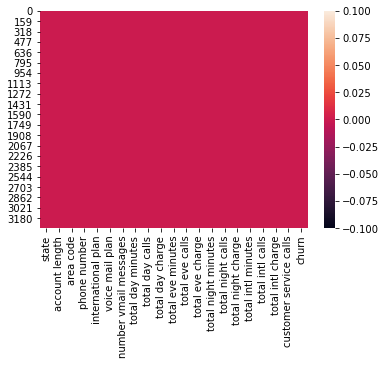

In [26]:
#Number_Weeks_Used column has missing values .
sns.heatmap(df.isna())


In [27]:
#Lets print unique values for each column
for col in df.columns:
    print("***************",col,"************")
    print(df[col].value_counts())
    print('\n')

*************** state ************
WV    106
MN     84
NY     83
AL     80
OH     78
WI     78
OR     78
VA     77
WY     77
CT     74
ID     73
VT     73
MI     73
UT     72
TX     72
IN     71
KS     70
MD     70
NJ     68
NC     68
MT     68
CO     66
WA     66
NV     66
MS     65
MA     65
RI     65
AZ     64
MO     63
FL     63
ND     62
NM     62
ME     62
NE     61
DE     61
OK     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
DC     54
GA     54
TN     53
HI     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64


*************** account length ************
105    43
87     42
93     40
101    40
90     39
       ..
191     1
199     1
215     1
221     1
2       1
Name: account length, Length: 212, dtype: int64


*************** area code ************
415    1655
510     840
408     838
Name: area code, dtype: int64


*************** phone number ************
380-6437    1
346-8362    1
397-6064    1
392-5512    1
352-8508    1
    

In [28]:
df.isin(['?']).sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [29]:
df.sample()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
118,MO,112,510,409-1244,no,yes,36,113.7,117,19.33,...,82,13.39,177.6,118,7.99,10.0,3,2.7,2,False


In [34]:
df_1=df[df.churn==True]
df_group=df_1.groupby(['state']).count()['churn']
df_group=df_group.sort_values(ascending=False)
df_group
#TX and NJ state has more churn rate


state
TX    18
NJ    18
MD    17
MI    16
NY    15
MN    15
MS    14
MT    14
WA    14
SC    14
NV    14
ME    13
KS    13
CT    12
NC    11
MA    11
OR    11
AR    11
OH    10
UT    10
WV    10
IN     9
ID     9
DE     9
CO     9
CA     9
WY     9
NH     9
OK     9
VT     8
SD     8
FL     8
KY     8
PA     8
GA     8
AL     8
MO     7
WI     7
ND     6
RI     6
NM     6
IL     5
DC     5
TN     5
VA     5
NE     5
LA     4
AZ     4
HI     3
IA     3
AK     3
Name: churn, dtype: int64

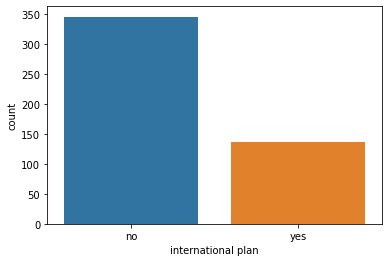

In [40]:
sns.countplot(data=df_1,x='international plan')
# people without international plan have more churn rate

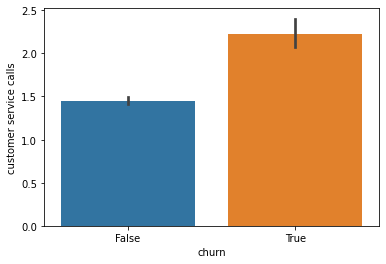

In [43]:
sns.barplot(data=df,y='customer service calls',x='churn')
# people with less customer service call have less churn rate



In [45]:
for col in df.columns:
    if(is_string_dtype(df[col])):
        labelEncoder=LabelEncoder()
        df[col]=labelEncoder.fit_transform(df[col])

In [46]:
df.describe()
#area code,number vmail messages have skewed data
#account length,phone number,total day minutes,total eve minutes fields having outliers

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.00000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,26.059406,101.064806,437.182418,1666.00000,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,14.824911,39.822106,42.371290,962.29855,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,0.000000,1.000000,408.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,74.000000,408.000000,833.00000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,26.000000,101.000000,415.000000,1666.00000,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,39.000000,127.000000,510.000000,2499.00000,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,50.000000,243.000000,510.000000,3332.00000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [50]:
df.dtypes

state                       int32
account length              int64
area code                   int64
phone number                int32
international plan          int32
voice mail plan             int32
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [52]:
df['churn']=df['churn'].astype(int)

In [54]:
df['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

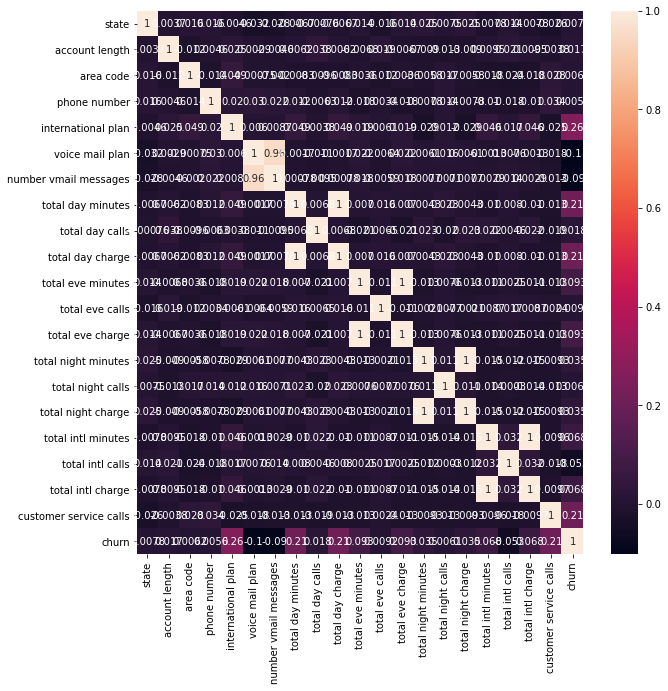

In [55]:
#heatmap shows absence of missing values in dataset
#find corelation
corr_=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(data=corr_,annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000150CBBC8D90>,
      dtype=object)

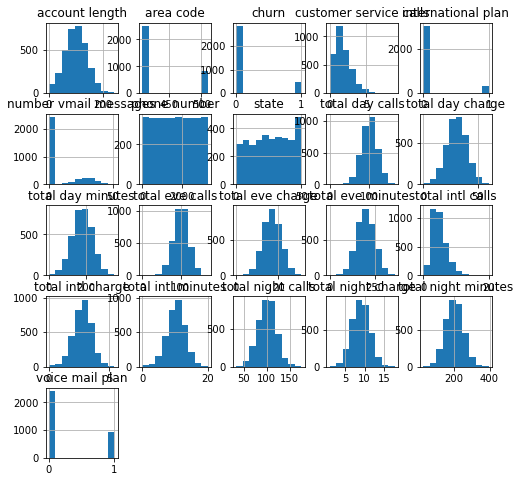

In [56]:
df.hist(figsize=(8,8))

In [57]:

df.skew()

state                    -0.064618
account length            0.096606
area code                 1.126823
phone number              0.000000
international plan        2.726332
voice mail plan           0.999140
number vmail messages     1.264824
total day minutes        -0.029077
total day calls          -0.111787
total day charge         -0.029083
total eve minutes        -0.023877
total eve calls          -0.055563
total eve charge         -0.023858
total night minutes       0.008921
total night calls         0.032500
total night charge        0.008886
total intl minutes       -0.245136
total intl calls          1.321478
total intl charge        -0.245287
customer service calls    1.091359
churn                     2.018356
dtype: float64

In [58]:
#remove skewed data where skewness is > 0.55
for col in df.columns:
    if(col!='churn'):
        if(df[col].skew()>0.55):
            df[col]=np.log1p(df[col])

state                        AxesSubplot(0.125,0.772143;0.168478x0.107857)
account length            AxesSubplot(0.327174,0.772143;0.168478x0.107857)
area code                 AxesSubplot(0.529348,0.772143;0.168478x0.107857)
phone number              AxesSubplot(0.731522,0.772143;0.168478x0.107857)
international plan           AxesSubplot(0.125,0.642714;0.168478x0.107857)
voice mail plan           AxesSubplot(0.327174,0.642714;0.168478x0.107857)
number vmail messages     AxesSubplot(0.529348,0.642714;0.168478x0.107857)
total day minutes         AxesSubplot(0.731522,0.642714;0.168478x0.107857)
total day calls              AxesSubplot(0.125,0.513286;0.168478x0.107857)
total day charge          AxesSubplot(0.327174,0.513286;0.168478x0.107857)
total eve minutes         AxesSubplot(0.529348,0.513286;0.168478x0.107857)
total eve calls           AxesSubplot(0.731522,0.513286;0.168478x0.107857)
total eve charge             AxesSubplot(0.125,0.383857;0.168478x0.107857)
total night minutes      

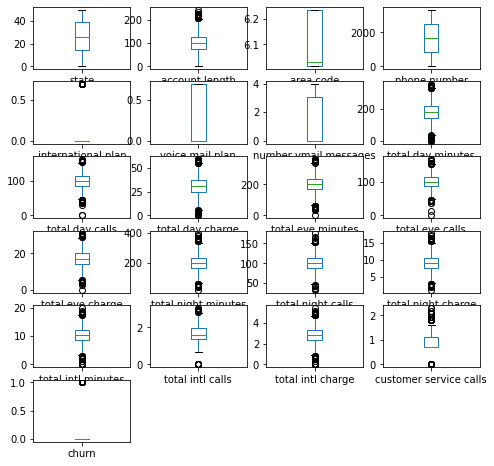

In [62]:
df.plot.box(layout=(6,4),figsize=(8,8),subplots=True)

In [63]:
#remove outliers
z=np.abs(zscore(df))
df=df[(z<3).all(axis=1)]
df.shape


(2936, 21)

In [64]:
x=df.drop('churn',axis=1)
y=df['churn']
print(x.shape,y.shape)

(2936, 20) (2936,)


In [65]:
standardScaler=StandardScaler()
x=standardScaler.fit_transform(x)
x

array([[-0.67750569,  0.69427433, -0.50712663, ..., -0.53592402,
        -0.10125643, -0.23781851],
       [ 0.60390671,  0.16454079, -0.50712663, ..., -0.53592402,
         1.2825767 , -0.23781851],
       [ 0.33413568,  0.92130298, -0.50712663, ...,  0.42492483,
         0.71520512, -1.5777369 ],
       ...,
       [ 1.54810533, -0.81925006, -0.50712663, ..., -0.00713074,
        -0.25347807,  1.10209988],
       [ 0.87367775, -1.82826632,  1.74443196, ...,  0.79022261,
         1.43479834,  0.54598351],
       [ 1.07600602, -0.66789762, -0.50712663, ..., -0.00713074,
         1.2825767 , -1.5777369 ]])

In [66]:
lr_reg=LogisticRegression()
svr=SVC()
dtree_reg=DecisionTreeClassifier()
kn_reg=KNeighborsClassifier()
sgd_reg=SGDClassifier()
gradient_reg=GradientBoostingClassifier()
ada_reg=AdaBoostClassifier()
rand_reg=RandomForestClassifier()
gaussian_nb=GaussianNB()

In [67]:
models=[]
models.append(('Logistic Regression',lr_reg))
models.append(('SVC',svr))
models.append(('DecisionTreeClassifier',dtree_reg))
models.append(('KNeighborsClassifier',kn_reg))
models.append(('SGDClassifier',sgd_reg))
models.append(('Gradient Boost Classifier',gradient_reg))
models.append(('Ada Boost Classifier',ada_reg ))
models.append(('RandomForestClassifier',rand_reg))
models.append(('GaussianNB',gaussian_nb))

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [69]:
#finding and storing matrix model wise
cross_val_list=[]
accuracy_list=[]
model_name_list=[]
roc_auc_score_list=[]
f1_score_list=[]
precission_score_list=[]
recall_score_list=[]

for reg_name,reg_obj in models:
    reg_obj.fit(x_train,y_train)
    y_pred=reg_obj.predict(x_test)
    cross_val_list.append(cross_val_score(reg_obj,x,y,cv=10,scoring='accuracy').mean())
    accuracy_list.append(accuracy_score(y_test,y_pred))
    model_name_list.append(reg_name)
    

In [70]:
df_matrix=pd.DataFrame({'Estimator_Name':model_name_list,'cross_val_Score':cross_val_list,'accuracy_score':accuracy_list})
df_matrix

,Estimator_Name,cross_val_Score,accuracy_score
0,Logistic Regression,0.896803,0.909864
1,SVC,0.926430,0.933673
2,DecisionTreeClassifier,0.914505,0.903061
3,KNeighborsClassifier,0.910420,0.920068
4,SGDClassifier,0.889308,0.904762
5,Gradient Boost Classifier,0.949595,0.955782
6,Ada Boost Classifier,0.893393,0.886054
7,RandomForestClassifier,0.954018,0.964286
8,GaussianNB,0.909069,0.920068


In [71]:
#from above matrix RandomForestClassifier   working better compare to other estimator .

rand_reg.fit(x_train,y_train)
y_pred=rand_reg.predict(x_test)
print('score',rand_reg.score(x_train,y_train))
print('accuracy_score',accuracy_score(y_test,y_pred))
print('confusion_matrix \n',confusion_matrix(y_test,y_pred))
print('classification_report',classification_report(y_test,y_pred))

score 1.0
accuracy_score 0.9625850340136054
confusion_matrix 
 [[523   3]
 [ 19  43]]
classification_report               precision    recall  f1-score   support

           0       0.96      0.99      0.98       526
           1       0.93      0.69      0.80        62

    accuracy                           0.96       588
   macro avg       0.95      0.84      0.89       588
weighted avg       0.96      0.96      0.96       588



In [73]:
joblib.dump(rand_reg,'Telecom_customer_churn_Case_Study')

['Telecom_customer_churn_Case_Study']

0.8439224825217712


Text(0, 0.5, 'True +ve Rate')

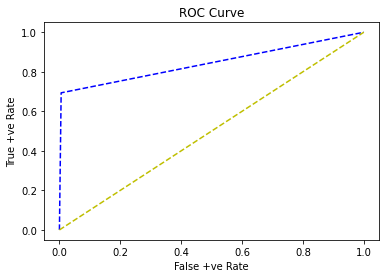

In [78]:
#roc curve
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
roc_auc=auc(fpr,tpr)
print(roc_auc)
plt.plot(fpr,tpr,'b--')
plt.plot([0,1],[0,1],'y--')
#plt.legend(loc='lower right')
plt.title('ROC Curve')
plt.xlabel('False +ve Rate')
plt.ylabel('True +ve Rate')
#RandomForestClassifier working better